# 需求:在jupyter下对职位信息进行可视化分析;

## 1. 薪资相关
1)薪资分析
2)不同城市薪资分布
3)N薪分布
4)工作年限与薪资

## 2. 职位分析
1)不同城市职位数量
2)公司融资情况
3)不同行业公司数量
4)工作经验分析
5)职位标签：词云制作


### 做的时候碰到了很多问题，有些地方迟迟下不去手，不明白应该怎样去分析。看完直播后参考了直播的案例又做了一遍。理解完代码后自己敲了一边，碰到了一个问题。在词云制作统计标签数量是，因为标签是['教育', '数据分析']这种格式，用strip把中括号去掉后，再用split按照逗号切分,得到了'教育', '数据分析'并存在不同的列中。当我还想再用strip把两边的引号去掉时，发现只能去掉右边的引号，始终得不到想要的结果。而这个参考代码则是自己写了一个函数，用这个函数一次性把格式弄成想要的。为什么strip做不到？


In [1509]:
# 模块导入
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 防止负数乱码
plt.rcParams['axes.unicode_minus']=False
#让sns支持中文
sns.set_style({"font.sans-serif":['simhei','Droid Sans Fallback']})

In [1510]:
# 加载数据集
fpath = r'C:\Users\XCF\Desktop\驭风计划\第四次作业\题目4数据.csv'
df = pd.read_csv(fpath, encoding='gbk')
df.head(5)

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage
0,8280292,资深数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,企业服务,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,['数据分析'],...,2021/4/26 10:00,北京,海淀区,NaN,15k-30k,14,3-5年,全职,本科,"发展空间大,弹性工作制,领导Nice"
1,8437217,数据分析实习生,北京字节跳动网络技术有限公司,字节跳动,2000人以上,D轮及以上,"内容资讯,短视频","['扁平管理', '弹性工作', '就近租房补贴', '六险一金']",开发|测试|运维类,['后端开发'],...,2021/4/28 5:18,北京,海淀区,NaN,3k-6k,0,在校/应届,实习,本科,"下午茶,健身瑜伽,免费三餐,弹性工作"
2,6559839,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,['数据分析'],...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",25k-45k,0,5-10年,全职,本科,大牛团队 发展前景 薪资客观
3,8168535,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,"['商业', 'SQL', '数据分析']",...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",15k-30k,14,1-3年,全职,本科,发展前景好，大牛团队
4,8438943,数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,"工具类产品,在线教育","['五险一金', '弹性工作', '带薪年假', '免费两餐']",产品|需求|项目类,"['数据分析', 'hive', 'SQL']",...,2021/4/26 10:00,北京,海淀区,NaN,15k-25k,0,1-3年,全职,本科,15薪


## 1. 薪资相关
1)薪资分析
2)不同城市薪资分布
3)N薪分布
4)工作年限与薪资

In [1511]:
#查看薪资的格式
df["salary"].unique()

array(['15k-30k', '3k-6k', '25k-45k', '15k-25k', '2k-4k', '20k-40k',
       '18k-36k', '20k-30k', '15k-20k', '25k-40k', '25k-50k', '20k-35k',
       '13k-25k', '18k-35k', '13k-20k', '4k-8k', '25k-35k', '8k-13k',
       '10k-12k', '10k-20k', '15k-22k', '12k-24k', '10k-15k', '15k-28k',
       '35k-50k', '30k-60k', '20k-25k', '6k-8k', '10k-18k', '8k-15k',
       '6k-9k', '10k-13k', '3k-5k', '18k-30k', '9k-15k', '40k-80k',
       '18k-23k', '4k-5k', '12k-19k', '8k-10k', '2k-3k', '12k-20k',
       '30k-55k', '12k-18k', '6k-10k', '8k-16k', '30k-40k', '6k-12k',
       '7k-14k', '18k-28k', '18k-25k', '3k-4k', '16k-30k', '17k-30k',
       '28k-48k', '8k-12k', '30k-50k', '35k-60k', '40k-60k', '15k-27k',
       '7k-12k', '22k-27k', '25k-30k', '20k-28k', '12k-15k', '7k-8k',
       '9k-18k', '13k-18k', '13k-15k', '11k-20k', '35k-55k', '7k-10k',
       '17k-22k', '50k-80k', '9k-11k', '5k-9k', '13k-19k', '16k-20k',
       '14k-20k', '4k-6k', '15k-18k', '15k-26k', '18k-22k', '22k-37k',
       '10k-14k

In [1512]:
# 最低薪资与最高薪资
df[['salary_min','salary_max']] = df['salary'].str.split('-', expand=True)
# 提取数字部分
df['salary_min'] = df['salary_min'].str.extract(r'(\d+\.?\d*)').astype(float)
df['salary_max'] = df['salary_max'].str.extract(r'(\d+\.?\d*)').astype(float)
# 平均薪资
df['salary_mean'] = (df['salary_min']+df['salary_max'])/2
df

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage,salary_min,salary_max,salary_mean
0,8280292,资深数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,企业服务,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,['数据分析'],...,NaN,15k-30k,14,3-5年,全职,本科,"发展空间大,弹性工作制,领导Nice",15.0,30.0,22.5
1,8437217,数据分析实习生,北京字节跳动网络技术有限公司,字节跳动,2000人以上,D轮及以上,"内容资讯,短视频","['扁平管理', '弹性工作', '就近租房补贴', '六险一金']",开发|测试|运维类,['后端开发'],...,NaN,3k-6k,0,在校/应届,实习,本科,"下午茶,健身瑜伽,免费三餐,弹性工作",3.0,6.0,4.5
2,6559839,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,['数据分析'],...,"['西北旺', '上地', '清河']",25k-45k,0,5-10年,全职,本科,大牛团队 发展前景 薪资客观,25.0,45.0,35.0
3,8168535,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,"['商业', 'SQL', '数据分析']",...,"['西北旺', '上地', '清河']",15k-30k,14,1-3年,全职,本科,发展前景好，大牛团队,15.0,30.0,22.5
4,8438943,数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,"工具类产品,在线教育","['五险一金', '弹性工作', '带薪年假', '免费两餐']",产品|需求|项目类,"['数据分析', 'hive', 'SQL']",...,NaN,15k-25k,0,1-3年,全职,本科,15薪,15.0,25.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,7928717,流程专员,腾讯科技（深圳）有限公司,腾讯,2000人以上,上市公司,"游戏,社交媒体,音频｜视频媒体","['免费班车', '成长空间', '年度旅游', '岗位晋升']",产品|需求|项目类,"['体系', '指标', '项目管理', '过程管理', '数据分析', '指标管理']",...,NaN,8k-14k,13,3-5年,全职,本科,互联网；职业发展,8.0,14.0,11.0
3176,8426839,高级产品经理,重庆康洲大数据有限公司,药智网,150-500人,未融资,数据服务｜咨询,[],产品|需求|项目类,['产品策划'],...,NaN,10k-20k,0,5-10年,全职,本科,五险一金—带薪年假—周末双休、餐补,10.0,20.0,15.0
3177,8428647,高级数据架构师,重庆康洲大数据有限公司,药智网,150-500人,未融资,数据服务｜咨询,[],开发|测试|运维类,['数据服务｜咨询'],...,NaN,15k-22k,0,1-3年,全职,本科,五险一金—带薪年假—周末双休、餐补,15.0,22.0,18.5
3178,3506705,软件工程师-实习生,重庆道微投资管理有限公司,重庆道微投资,15-50人,不需要融资,金融,"['专项奖金', '弹性工作', '节日礼物', '领导好']",开发|测试|运维类,"['科技金融', '金融业', '软件开发']",...,['大竹林'],3k-4k,0,不限,实习,本科,"弹性工作,节日福利,扁平化管理",3.0,4.0,3.5


In [1513]:
# 查看有无缺省值
df['salary_mean'].isnull().sum()

1

In [1514]:
# 丢弃
df.dropna(subset='salary_mean', inplace=True)

In [1515]:
df['salary_mean'].describe

<bound method NDFrame.describe of 0       22.5
1        4.5
2       35.0
3       22.5
4       20.0
        ... 
3175    11.0
3176    15.0
3177    18.5
3178     3.5
3179     9.5
Name: salary_mean, Length: 3179, dtype: float64>

<Axes: >

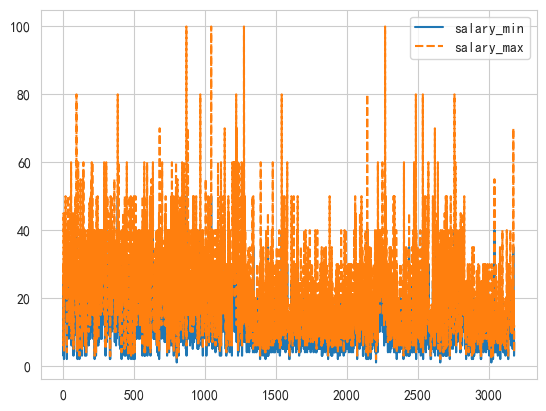

In [1516]:
# 最高薪资与最低薪资
sns.lineplot(data=df[['salary_min','salary_max']])

# 不同城市薪资分布

In [1517]:
df1 = df[['city','district','salary', 'salary_min', 'salary_max', 'salary_mean']]
df1 = df1.set_index(['city','district'])

Text(0, 0.5, '千元')

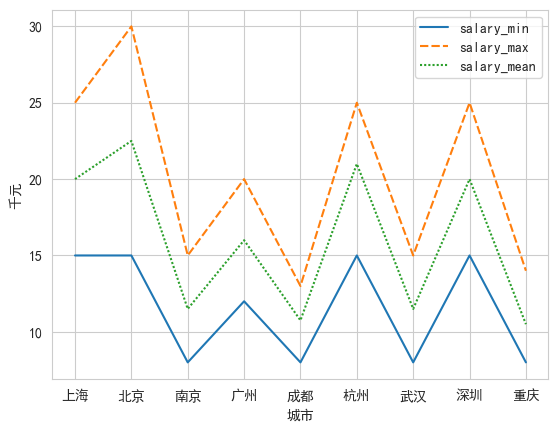

In [1518]:
median = df1.groupby('city')[['salary_min', 'salary_max', 'salary_mean']].median()
sns.lineplot(data=median)
plt.xlabel('城市')
plt.ylabel('千元')

# N薪分布

In [1519]:
Nsalary = df.salaryMonth
Nsalary

0       14
1        0
2        0
3       14
4        0
        ..
3175    13
3176     0
3177     0
3178     0
3179     0
Name: salaryMonth, Length: 3179, dtype: int64

In [1520]:
Nsalary = pd.DataFrame(Nsalary.replace(0,12),columns = ["salaryMonth"])
Nsalary

,salaryMonth
0,14
1,12
2,12
3,14
4,12
...,...
3175,13
3176,12
3177,12
3178,12


In [1521]:
Nsalary["salaryMonth"].describe()

count    3179.000000
mean       12.811261
std         1.215170
min        12.000000
25%        12.000000
50%        12.000000
75%        13.000000
max        24.000000
Name: salaryMonth, dtype: float64

Text(0.5, 1.0, 'Nsalary Count')

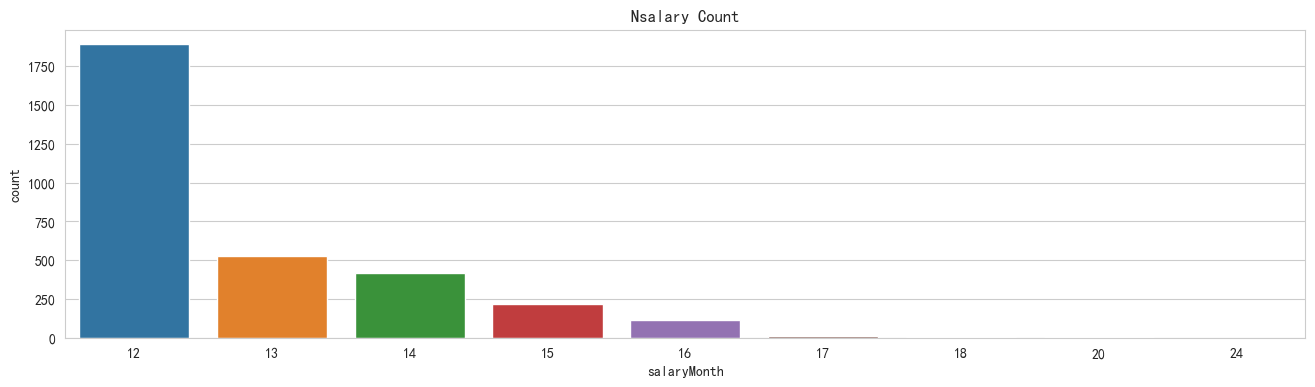

In [1522]:
plt.figure(figsize = (16,4))
ax = sns.countplot(data = Nsalary, x = "salaryMonth")
ax.set_title("Nsalary Count")

# 工资年限与薪资

In [1523]:
df['workYear'].unique()

array(['3-5年', '在校/应届', '5-10年', '1-3年', '不限', '1年以下', '10年以上'],
      dtype=object)

In [1524]:
workYearOrder = ["在校/应届","1年以下","1-3年","3-5年","5-10年","10年以上","不限"]

In [1525]:
SalaryByWorkYear = df.groupby("workYear")["salary_mean"].apply(lambda x: x.map(lambda y: int(y)).mean())
SalaryByWorkYear = SalaryByWorkYear.reset_index()
SalaryByWorkYear

,workYear,salary_mean
0,1-3年,12.580178
1,10年以上,44.200000
2,1年以下,8.039216
3,3-5年,20.406446
4,5-10年,27.466993
5,不限,14.551802
6,在校/应届,7.252000


Text(0.5, 1.0, '工作年限与薪资')

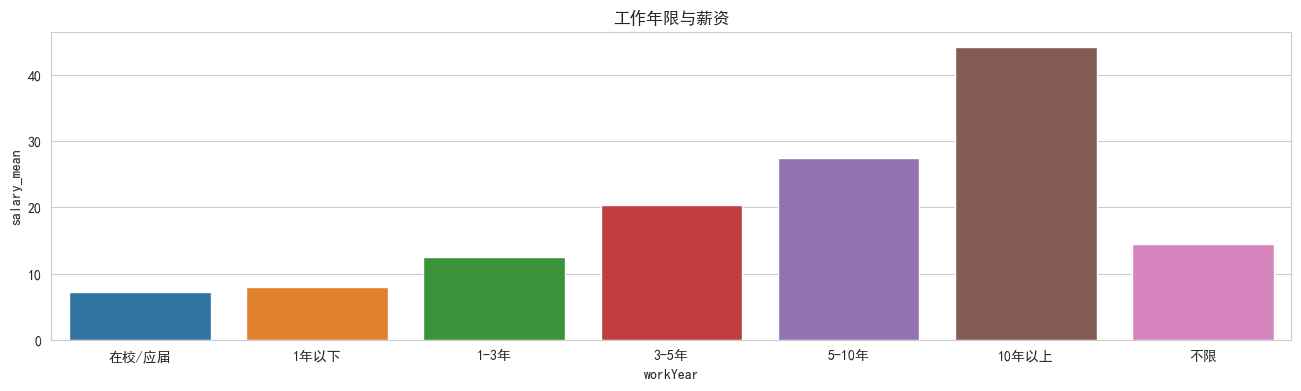

In [1526]:
plt.figure(figsize = (16,4))
ax = sns.barplot(data = SalaryByWorkYear,x="workYear",y = "salary_mean",order=workYearOrder)
ax.set_title("工作年限与薪资")

# 2.职位分析

## 不同城市职位数量

In [1527]:
#根据城市分组，获取各个城市所拥有的职位名称
jobsByCity = df.groupby("city")["positionName"].unique()
jobsByCity

city
上海    [数据分析师, 高级数据分析师, 数据分析实习生, 资深数据分析师, 薪酬数据分析专员, 数...
北京    [资深数据分析师, 数据分析实习生, 数据分析师, 数据分析工程师, 游戏数据分析师, 高级...
南京    [数据分析师, 数据分析产品研发负责人-To B, 资深数据分析师, 商品数据分析师 (MJ...
广州    [数据分析师, 高级数据分析师, 资深数据分析师, 数据分析专员, 数据分析, 数据分析实习...
成都    [数据分析师, 资深数据分析师, 数据分析专家, 数据分析专员, 高级数据分析师, 数据分析...
杭州    [高级数据分析师, 电商数据分析师, (高级)数据分析师专家, 数据分析实习生, 数据分析师...
武汉    [数据分析师, 高级数据分析师(大力教育), 数据分析专家, 高级数据分析师, 数据分析工程...
深圳    [资深数据分析师, 数据分析师, 社交媒体数据分析, 022440-数据分析岗, 02420...
重庆    [数据分析师, 数据分析（运营支持）, 数据分析主管, 高级数据分析师, 数据分析专员, 大...
Name: positionName, dtype: object

In [1528]:
jobsByCity = jobsByCity.reset_index()
jobsByCity["positionName"] = jobsByCity["positionName"].apply(lambda x: "|".join(x))

temp = jobsByCity['city']
jobsByCity = jobsByCity['positionName'].str.split(r'|',expand = True)
jobsByCity['city'] = temp
jobsByCity

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,city
0,数据分析师,高级数据分析师,数据分析实习生,资深数据分析师,薪酬数据分析专员,数据分析专家,抖音高级数据分析师,0231VS-数据建模设计岗,数据分析工程师,BK41XN-数据分析岗,...,None,None,None,None,None,None,None,None,None,上海
1,资深数据分析师,数据分析实习生,数据分析师,数据分析工程师,游戏数据分析师,高级数据分析师,数据分析专家,高级/资深渠道数据分析,数据分析营销课讲师,数据分析,...,None,None,None,None,None,None,None,None,None,北京
2,数据分析师,数据分析产品研发负责人-To B,资深数据分析师,商品数据分析师 (MJ002892),数据分析专家,数据分析 (MJ011252),数据分析（南京）,高级数据分析师,数据分析师（浏览器/小视频）(003521),医药数据分析师(疫苗方向),...,None,None,None,None,None,None,None,None,None,南京
3,数据分析师,高级数据分析师,资深数据分析师,数据分析专员,数据分析,数据分析实习生,数据分析（MJ000593）,国际化广告数据分析师,电商客服主任（数据分析）,大数据分析师,...,None,None,None,None,None,None,None,None,None,广州
4,数据分析师,资深数据分析师,数据分析专家,数据分析专员,高级数据分析师,数据分析实习生,数据分析（建模方向）,高级数据分析工程师 (MJ000753),商业数据分析师,高级数据分析师 (MJ000551),...,None,None,None,None,None,None,None,None,None,成都
5,高级数据分析师,电商数据分析师,(高级)数据分析师专家,数据分析实习生,数据分析师,数据分析专员,抖音电商 - 数据分析师（产品分析方向）,数据分析（公司运营及资本市场方向）,资深数据分析师,数据分析师-供应链,...,None,None,None,None,None,None,None,None,None,杭州
6,数据分析师,高级数据分析师(大力教育),数据分析专家,高级数据分析师,数据分析工程师,数据分析-智能转化部门-流量运营中心,英语数据分析,大数据挖掘/大数据分析,数据分析师—商业化,资深数据分析师,...,.net开发工程师,运营主管,BI产品运营工程师,增长产品经理,资深java研发工程师-武汉,高级前端开发工程师-武汉,短视频运营经理,商家运营,运营技术创新（大数据）,武汉
7,资深数据分析师,数据分析师,社交媒体数据分析,022440-数据分析岗,02420A-数据分析岗,高级数据分析师,数据分析专家,数据分析,数据分析专员,Shopee Food数据分析工程师,...,None,None,None,None,None,None,None,None,None,深圳
8,数据分析师,数据分析（运营支持）,数据分析主管,高级数据分析师,数据分析专员,大数据分析工程师（安全态势感知方向）,大数据分析师（项目方向）,大数据分析工程师(实习),反欺诈数据分析师,数据分析师实习生,...,None,None,None,None,None,None,None,None,None,重庆


In [1529]:
jobsByCity = jobsByCity.reset_index()
jobsByCity = jobsByCity.set_index('city')
jobsByCity

,index,0,1,2,3,4,5,6,7,8,...,335,336,337,338,339,340,341,342,343,344
city,,,,,,,,,,,,,,,,,,,,,
上海,0,数据分析师,高级数据分析师,数据分析实习生,资深数据分析师,薪酬数据分析专员,数据分析专家,抖音高级数据分析师,0231VS-数据建模设计岗,数据分析工程师,...,None,None,None,None,None,None,None,None,None,None
北京,1,资深数据分析师,数据分析实习生,数据分析师,数据分析工程师,游戏数据分析师,高级数据分析师,数据分析专家,高级/资深渠道数据分析,数据分析营销课讲师,...,None,None,None,None,None,None,None,None,None,None
南京,2,数据分析师,数据分析产品研发负责人-To B,资深数据分析师,商品数据分析师 (MJ002892),数据分析专家,数据分析 (MJ011252),数据分析（南京）,高级数据分析师,数据分析师（浏览器/小视频）(003521),...,None,None,None,None,None,None,None,None,None,None
广州,3,数据分析师,高级数据分析师,资深数据分析师,数据分析专员,数据分析,数据分析实习生,数据分析（MJ000593）,国际化广告数据分析师,电商客服主任（数据分析）,...,None,None,None,None,None,None,None,None,None,None
成都,4,数据分析师,资深数据分析师,数据分析专家,数据分析专员,高级数据分析师,数据分析实习生,数据分析（建模方向）,高级数据分析工程师 (MJ000753),商业数据分析师,...,None,None,None,None,None,None,None,None,None,None
杭州,5,高级数据分析师,电商数据分析师,(高级)数据分析师专家,数据分析实习生,数据分析师,数据分析专员,抖音电商 - 数据分析师（产品分析方向）,数据分析（公司运营及资本市场方向）,资深数据分析师,...,None,None,None,None,None,None,None,None,None,None
武汉,6,数据分析师,高级数据分析师(大力教育),数据分析专家,高级数据分析师,数据分析工程师,数据分析-智能转化部门-流量运营中心,英语数据分析,大数据挖掘/大数据分析,数据分析师—商业化,...,高级运营经理,.net开发工程师,运营主管,BI产品运营工程师,增长产品经理,资深java研发工程师-武汉,高级前端开发工程师-武汉,短视频运营经理,商家运营,运营技术创新（大数据）
深圳,7,资深数据分析师,数据分析师,社交媒体数据分析,022440-数据分析岗,02420A-数据分析岗,高级数据分析师,数据分析专家,数据分析,数据分析专员,...,None,None,None,None,None,None,None,None,None,None
重庆,8,数据分析师,数据分析（运营支持）,数据分析主管,高级数据分析师,数据分析专员,大数据分析工程师（安全态势感知方向）,大数据分析师（项目方向）,大数据分析工程师(实习),反欺诈数据分析师,...,None,None,None,None,None,None,None,None,None,None


In [1530]:
jobsByCity.drop(['index'], axis = 1,inplace = True)
jobsByCity

,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
city,,,,,,,,,,,,,,,,,,,,,
上海,数据分析师,高级数据分析师,数据分析实习生,资深数据分析师,薪酬数据分析专员,数据分析专家,抖音高级数据分析师,0231VS-数据建模设计岗,数据分析工程师,BK41XN-数据分析岗,...,None,None,None,None,None,None,None,None,None,None
北京,资深数据分析师,数据分析实习生,数据分析师,数据分析工程师,游戏数据分析师,高级数据分析师,数据分析专家,高级/资深渠道数据分析,数据分析营销课讲师,数据分析,...,None,None,None,None,None,None,None,None,None,None
南京,数据分析师,数据分析产品研发负责人-To B,资深数据分析师,商品数据分析师 (MJ002892),数据分析专家,数据分析 (MJ011252),数据分析（南京）,高级数据分析师,数据分析师（浏览器/小视频）(003521),医药数据分析师(疫苗方向),...,None,None,None,None,None,None,None,None,None,None
广州,数据分析师,高级数据分析师,资深数据分析师,数据分析专员,数据分析,数据分析实习生,数据分析（MJ000593）,国际化广告数据分析师,电商客服主任（数据分析）,大数据分析师,...,None,None,None,None,None,None,None,None,None,None
成都,数据分析师,资深数据分析师,数据分析专家,数据分析专员,高级数据分析师,数据分析实习生,数据分析（建模方向）,高级数据分析工程师 (MJ000753),商业数据分析师,高级数据分析师 (MJ000551),...,None,None,None,None,None,None,None,None,None,None
杭州,高级数据分析师,电商数据分析师,(高级)数据分析师专家,数据分析实习生,数据分析师,数据分析专员,抖音电商 - 数据分析师（产品分析方向）,数据分析（公司运营及资本市场方向）,资深数据分析师,数据分析师-供应链,...,None,None,None,None,None,None,None,None,None,None
武汉,数据分析师,高级数据分析师(大力教育),数据分析专家,高级数据分析师,数据分析工程师,数据分析-智能转化部门-流量运营中心,英语数据分析,大数据挖掘/大数据分析,数据分析师—商业化,资深数据分析师,...,高级运营经理,.net开发工程师,运营主管,BI产品运营工程师,增长产品经理,资深java研发工程师-武汉,高级前端开发工程师-武汉,短视频运营经理,商家运营,运营技术创新（大数据）
深圳,资深数据分析师,数据分析师,社交媒体数据分析,022440-数据分析岗,02420A-数据分析岗,高级数据分析师,数据分析专家,数据分析,数据分析专员,Shopee Food数据分析工程师,...,None,None,None,None,None,None,None,None,None,None
重庆,数据分析师,数据分析（运营支持）,数据分析主管,高级数据分析师,数据分析专员,大数据分析工程师（安全态势感知方向）,大数据分析师（项目方向）,大数据分析工程师(实习),反欺诈数据分析师,数据分析师实习生,...,None,None,None,None,None,None,None,None,None,None


In [1531]:
# 统计不同地区的职位数量
row_count = jobsByCity.count(axis=1)
row_count = pd.DataFrame(row_count)
row_count = row_count.reset_index()
row_count.columns = ['city','nums']
row_count

,city,nums
0,上海,202
1,北京,188
2,南京,271
3,广州,111
4,成都,61
5,杭州,83
6,武汉,345
7,深圳,228
8,重庆,196


<Axes: xlabel='city', ylabel='nums'>

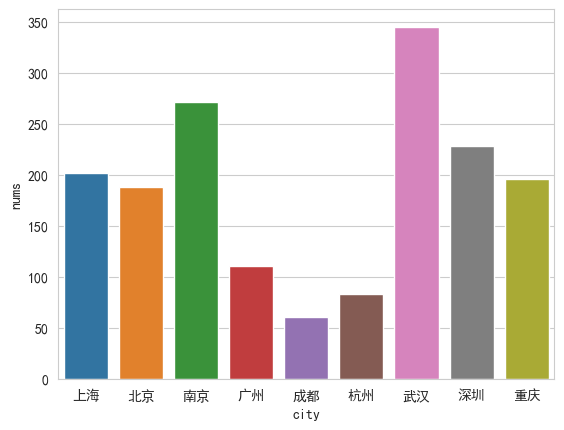

In [1532]:
sns.barplot(data=row_count, x="city", y="nums")

# 公司融资情况

In [1533]:
df.financeStage.unique()

array(['D轮及以上', '不需要融资', 'A轮', '上市公司', 'B轮', 'C轮', '未融资', '天使轮'],
      dtype=object)

In [1534]:
df.companyShortName.unique()

array(['拉勾网', '字节跳动', '欧科云链集团', ..., '博昆软件', '中国平安股份有限公司', '倍丝露电子商务'],
      dtype=object)

In [1535]:
compByFin = df.groupby("financeStage")['companyShortName'].unique()
compByFin

financeStage
A轮       [京东物流, 中电博亚, 拉克沙LAKSA, 音悦荚, 赛目科技, 悦福享, 集侦云, Da...
B轮       [鲸鱼外教培优, 易观, 小帮规划, 哗啦啦, 石墨文档, 斗米, 转转, 数数科技, 欢忻...
C轮       [乐约健康, 省钱快报, 果壳, 柏睿数据, 豌豆思维, 轻松集团, 资产360, 掌上先机...
D轮及以上    [拉勾网, 字节跳动, 小叶子The ONE, 爱回收, 每日优鲜, 闪送, 唱吧-玩音乐，...
上市公司     [小米集团, 360数科, 老虎集团, 贝壳, 掌阅, 紫光教育, 当当网, 赤子城, ca...
不需要融资    [欧科云链集团, 民生科技, 边锋, 琥珀创想, 泰康保险集团, Riley Cillian...
天使轮      [YoungGee, 众泽睿诚, 想出网络科技, 格蓝威驰科技, 上海荟力, 华信集团, 企...
未融资      [微淼财商, 地坪线, Dilato, 硅基远航, 国美金控, 融易推, 越博华阳商务服务,...
Name: companyShortName, dtype: object

In [1536]:
compByFin = compByFin.reset_index()
compByFin["companyShortName"] = compByFin["companyShortName"].apply(lambda x: "|".join(x))
temp = compByFin['financeStage']
compByFin = compByFin['companyShortName'].str.split(r'|',expand = True)
compByFin['financeStage'] = temp

In [1537]:
compByFin = compByFin.reset_index()
compByFin = compByFin.set_index('financeStage')
compByFin = compByFin.drop('index', axis=1)
compByFin

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
financeStage,,,,,,,,,,,,,,,,,,,,,
A轮,京东物流,中电博亚,拉克沙LAKSA,音悦荚,赛目科技,悦福享,集侦云,DataHunter,粉笔网,普罗,...,None,None,None,None,None,None,None,None,None,None
B轮,鲸鱼外教培优,易观,小帮规划,哗啦啦,石墨文档,斗米,转转,数数科技,欢忻网络,漫微科技,...,None,None,None,None,None,None,None,None,None,None
C轮,乐约健康,省钱快报,果壳,柏睿数据,豌豆思维,轻松集团,资产360,掌上先机-旺店通ERP,TalkingData,Trusfort芯盾时代,...,None,None,None,None,None,None,None,None,None,None
D轮及以上,拉勾网,字节跳动,小叶子The ONE,爱回收,每日优鲜,闪送,唱吧-玩音乐，就上唱吧！,思维造物,北京花房科技有限公司,探探,...,None,None,None,None,None,None,None,None,None,None
上市公司,小米集团,360数科,老虎集团,贝壳,掌阅,紫光教育,当当网,赤子城,capgemini,金山世游,...,None,None,None,None,None,None,None,None,None,None
不需要融资,欧科云链集团,民生科技,边锋,琥珀创想,泰康保险集团,Riley Cillian莱熙科技,滴滴,明翰,北京乐途原动力,高济医疗,...,蚁团传媒,慧商实业,搜利得,创弘电子商务,西西弗书店,毛毛虫电商,申盾通信,哒啦啦化妆品,星创医药,倍丝露电子商务
天使轮,YoungGee,众泽睿诚,想出网络科技,格蓝威驰科技,上海荟力,华信集团,企鹅吃喝,医药魔方,数据之家,物界（上海）科技有限公司,...,None,None,None,None,None,None,None,None,None,None
未融资,微淼财商,地坪线,Dilato,硅基远航,国美金控,融易推,越博华阳商务服务,储慧国际咨询,佰诺全景,纵横文学,...,None,None,None,None,None,None,None,None,None,None


In [1538]:
row_count = compByFin.count(axis=1)
row_count = pd.DataFrame(row_count)
row_count = row_count.reset_index()
row_count.columns = ['financeStage','nums']
row_count

,financeStage,nums
0,A轮,133
1,B轮,129
2,C轮,74
3,D轮及以上,78
4,上市公司,264
5,不需要融资,432
6,天使轮,51
7,未融资,312


<Axes: xlabel='financeStage', ylabel='nums'>

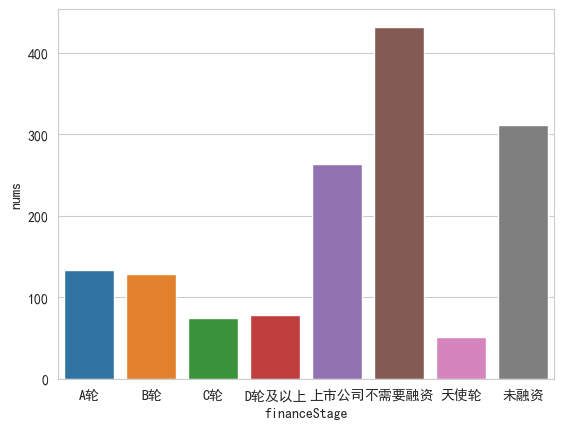

In [1539]:
sns.barplot(data=row_count, x="financeStage", y="nums")

# 不同行业公司数量

In [1540]:
df["industryField"].isnull().sum()

4

In [1541]:
df.dropna(subset=["industryField"],inplace = True)

In [1542]:
#提取需要的两列(公司，行业)
tmp = df[["companyShortName","industryField"]]
tmp.head(5)

,companyShortName,industryField
0,拉勾网,企业服务
1,字节跳动,"内容资讯,短视频"
2,欧科云链集团,区块链
3,欧科云链集团,区块链
4,拉勾网,"工具类产品,在线教育"


In [1543]:
#用str.split方法分割行业（一开始以为只有逗号和|，经过后面的分析才发现总共有5种分割的格式）
company = tmp.companyShortName
tmp = tmp.industryField.str.split(r"[,、\s]",expand=True)
tmp["company"] = company
tmp

,0,1,2,company
0,企业服务,None,None,拉勾网
1,内容资讯,短视频,None,字节跳动
2,区块链,None,None,欧科云链集团
3,区块链,None,None,欧科云链集团
4,工具类产品,在线教育,None,拉勾网
...,...,...,...,...
3175,游戏,社交媒体,音频｜视频媒体,腾讯
3176,数据服务｜咨询,None,None,药智网
3177,数据服务｜咨询,None,None,药智网
3178,金融,None,None,重庆道微投资


In [1544]:
tmp = tmp.set_index("company").stack().droplevel(1).reset_index().rename({0:"Field"},axis = 1)
tmp

,company,Field
0,拉勾网,企业服务
1,字节跳动,内容资讯
2,字节跳动,短视频
3,欧科云链集团,区块链
4,欧科云链集团,区块链
...,...,...
4625,腾讯,音频｜视频媒体
4626,药智网,数据服务｜咨询
4627,药智网,数据服务｜咨询
4628,重庆道微投资,金融


In [1545]:
#按照行业对公司进行分组
companyByField = tmp.groupby("Field")
#统计不同行业的公司数量
counts = pd.DataFrame(companyByField.count()).reset_index().rename({"company":"count"},axis = 1)
counts

,Field,count
0,IT技术服务｜咨询,165
1,MCN｜直播平台,28
2,不限,3
3,专业服务｜咨询,40
4,人工智能,23
...,...,...
66,软件服务｜咨询,192
67,通讯电子,6
68,金融,79
69,金融业,51


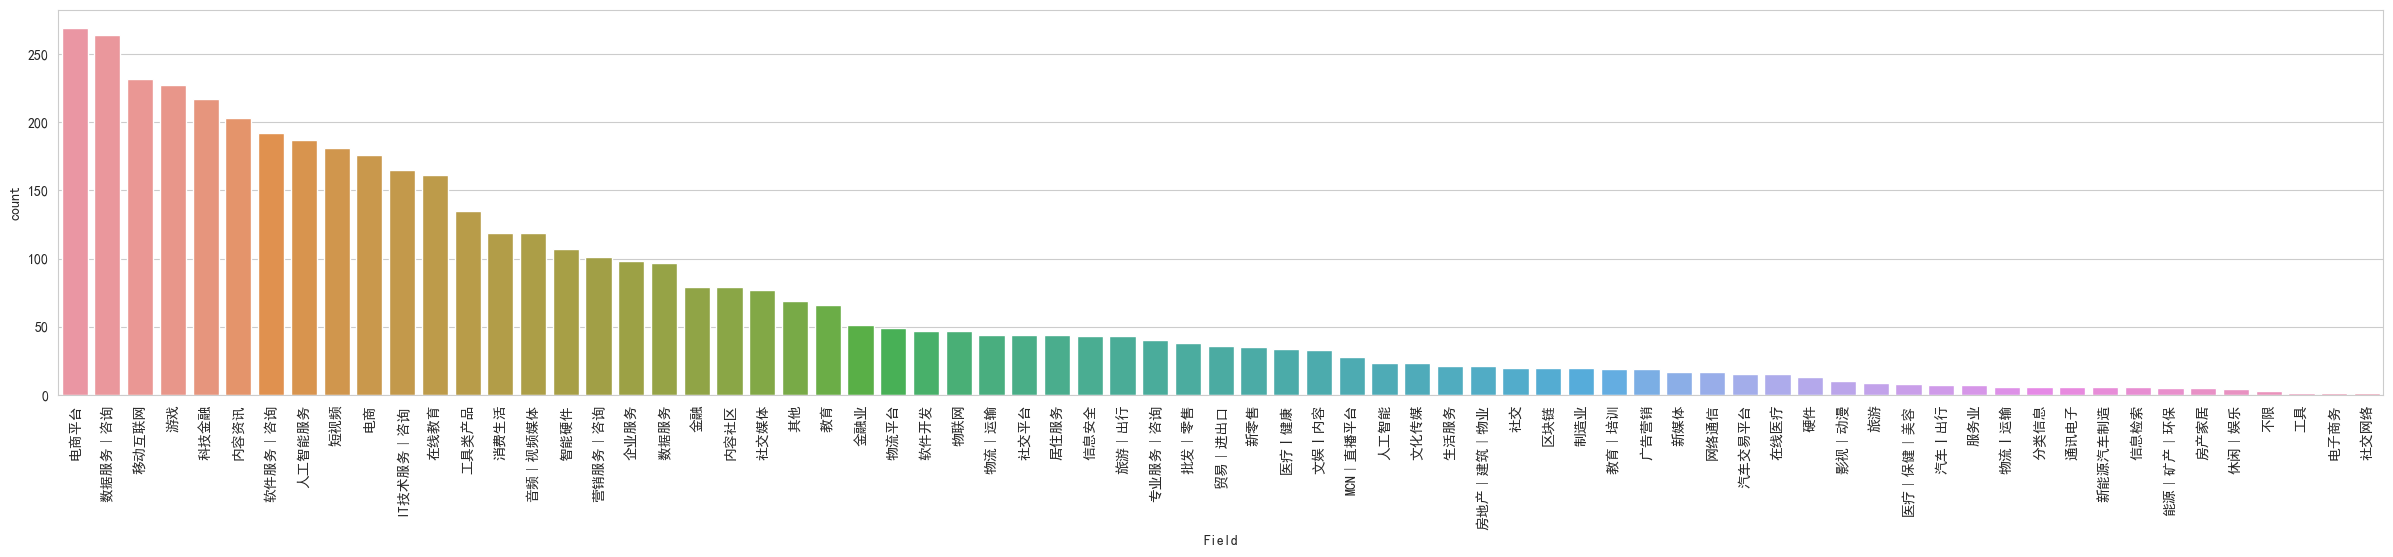

In [1546]:
counts.sort_values(by = "count",ascending = False,inplace = True)
plt.figure(figsize = (30,5))
ax = sns.barplot(data = counts, x = "Field", y ="count")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# 工作经验分析

In [1547]:
workYears = df.workYear
workYears.unique()

array(['3-5年', '在校/应届', '5-10年', '1-3年', '不限', '1年以下', '10年以上'],
      dtype=object)

<Axes: xlabel='workYear', ylabel='count'>

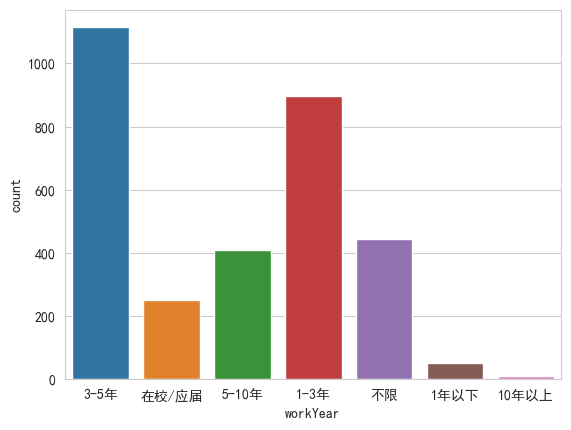

In [1548]:
sns.countplot(data = df, x = "workYear")

## 职位标签：词云制作

In [1549]:
lables = df.industryLables
lables = pd.Series(lables)
lables

0                                                 []
1                                           ['后端开发']
2                                                 []
3                                                 []
4                                                 []
                            ...                     
3175    ['体系', '指标', '项目管理', '过程管理', '数据分析', '指标管理']
3176                                              []
3177                                     ['数据服务｜咨询']
3178                         ['科技金融', '金融业', '软件开发']
3179                               ['证券/期货', '项目管理']
Name: industryLables, Length: 3175, dtype: object

In [1550]:
lables = lables.str.strip('[,]')
lables = lables.str.split(r"[，,]",expand=True)
lables

,0,1,2,3,4,5,6,7
0,,None,None,None,None,None,None,None
1,'后端开发',None,None,None,None,None,None,None
2,,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
3175,'体系','指标','项目管理','过程管理','数据分析','指标管理',None,None
3176,,None,None,None,None,None,None,None
3177,'数据服务｜咨询',None,None,None,None,None,None,None
3178,'科技金融','金融业','软件开发',None,None,None,None,None


In [1551]:
lables = lables.stack().droplevel(1).value_counts()
lables

             1305
 '数据分析'       473
'电商平台'        245
'游戏'          132
'电商'          125
             ... 
 '投放数据分析'       1
 '影视版权'         1
'网络文学'          1
 'TOB'          1
 '指标管理'         1
Length: 901, dtype: int64

In [1552]:
lables = lables.iloc[1:]
lables.rename('nums')
lables = lables.reset_index()
lables

,index,0
0,'数据分析',473
1,'电商平台',245
2,'游戏',132
3,'电商',125
4,'运营',114
...,...,...
895,'投放数据分析',1
896,'影视版权',1
897,'网络文学',1
898,'TOB',1


In [1553]:
# lables = lables.rename(columns = {'index':'lable', 0:'count'})
# lables['lable'].str.strip("'")

In [1554]:
# 把字符串['xxx','xxx']变为xxx,xxx以方便之后拆分各个标签
def normaliseStr(s):
    res = ""
    for c in s:
        if c.isalnum() or c == ",":
            res += c
    return res

In [1555]:
lables['index'] = lables['index'].map(normaliseStr)
lables = lables.rename(columns ={'index':'lables',0:'count'})
lables

,lables,count
0,数据分析,473
1,电商平台,245
2,游戏,132
3,电商,125
4,运营,114
...,...,...
895,投放数据分析,1
896,影视版权,1
897,网络文学,1
898,TOB,1


In [1556]:
#生成词云图需要的txt文件
f = open("wordCounts.txt","w",encoding="utf-8")
df = pd.DataFrame(lables)
lable = df['lables']
for i,row in enumerate(df.iterrows()):
    lable = row[1]["lables"]
    count = row[1]["count"]
    line = ((lable + " ")*count).strip(" ") + '\n'
    f.write(line)
f.close()

In [1557]:
import wordcloud
import matplotlib.font_manager as fm

In [1558]:
imgPath = "wordcloud.jpg"
font_path = fm.findfont(fm.FontProperties(family="SimHei"))
wc = wordcloud.WordCloud(font_path=font_path, background_color="white", max_words=1000, 
                         max_font_size=100, random_state=42, width=1000, height=860, collocations=False)
f = open("wordCounts.txt","r",encoding="utf-8")
words = f.read()
wc.generate(words)
wc.to_file(imgPath)